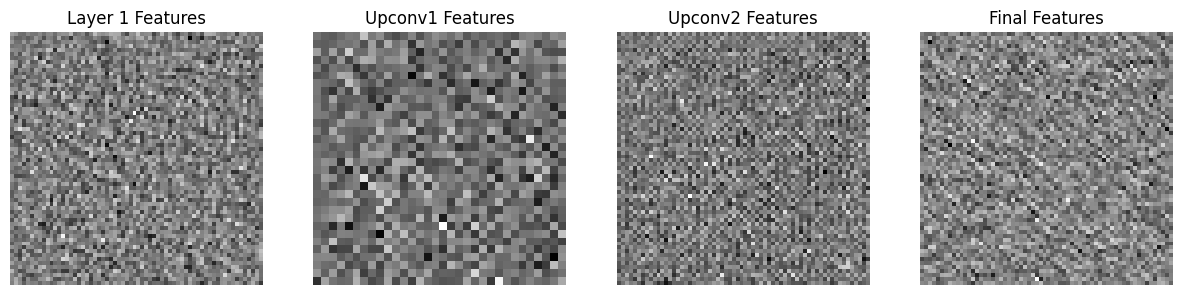

In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Definindo uma pequena rede convolucional para o exemplo
class SimpleFPN(nn.Module):
    def __init__(self):
        super(SimpleFPN, self).__init__()
        # Camada convolucional para extração de características de baixo nível
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)  # Reduz a resolução
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)  # Reduz ainda mais a resolução

        # Camadas para gerar a pirâmide de características
        self.upconv1 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.upconv2 = nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2)
        self.final_conv = nn.Conv2d(16, 3, kernel_size=1)

    def forward(self, x):
        # Extração de características
        x1 = self.conv1(x)
        x2 = self.conv2(x1)
        x3 = self.conv3(x2)

        # Geração da pirâmide
        x_up1 = self.upconv1(x3)
        x_up2 = self.upconv2(x_up1)

        # Combinação das características
        x_final = self.final_conv(x_up2 + x1)

        return x1, x_up1, x_up2, x_final

# Criando uma imagem de entrada simples (imagem de 3x64x64)
input_image = torch.randn(1, 3, 64, 64)

# Inicializando a rede e realizando a passagem para frente
model = SimpleFPN()
features = model(input_image)

# Função para exibir as características
def plot_features(features, titles):
    num_features = len(features)
    fig, axes = plt.subplots(1, num_features, figsize=(15, 5))
    
    for i, (ax, feature, title) in enumerate(zip(axes, features, titles)):
        # Seleciona a primeira amostra do batch e todos os canais
        feature_image = feature[0].detach().numpy()
        
        # Normaliza para [0, 1] e utiliza o primeiro canal se houver múltiplos canais
        if feature_image.shape[0] == 1:
            # Apenas um canal
            feature_image = feature_image[0]
        elif feature_image.shape[0] > 1:
            # Múltiplos canais; seleciona o canal médio para visualização
            feature_image = np.mean(feature_image, axis=0)
        
        feature_image = (feature_image - feature_image.min()) / (feature_image.max() - feature_image.min())
        
        ax.imshow(feature_image, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Exibindo as características extraídas
plot_features(features, ['Layer 1 Features', 'Upconv1 Features', 'Upconv2 Features', 'Final Features'])
